In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,auc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading data
df = pd.read_csv("heart.csv") 

In [4]:
df.shape

(303, 14)

In [5]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [6]:
df.columns = new_columns

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.shape

(303, 14)

In [9]:
# Preprocessing the data
#ata = data.drop(["ca", "slope", "thal"],axis=1)
#data = data.replace('?', np.nan)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


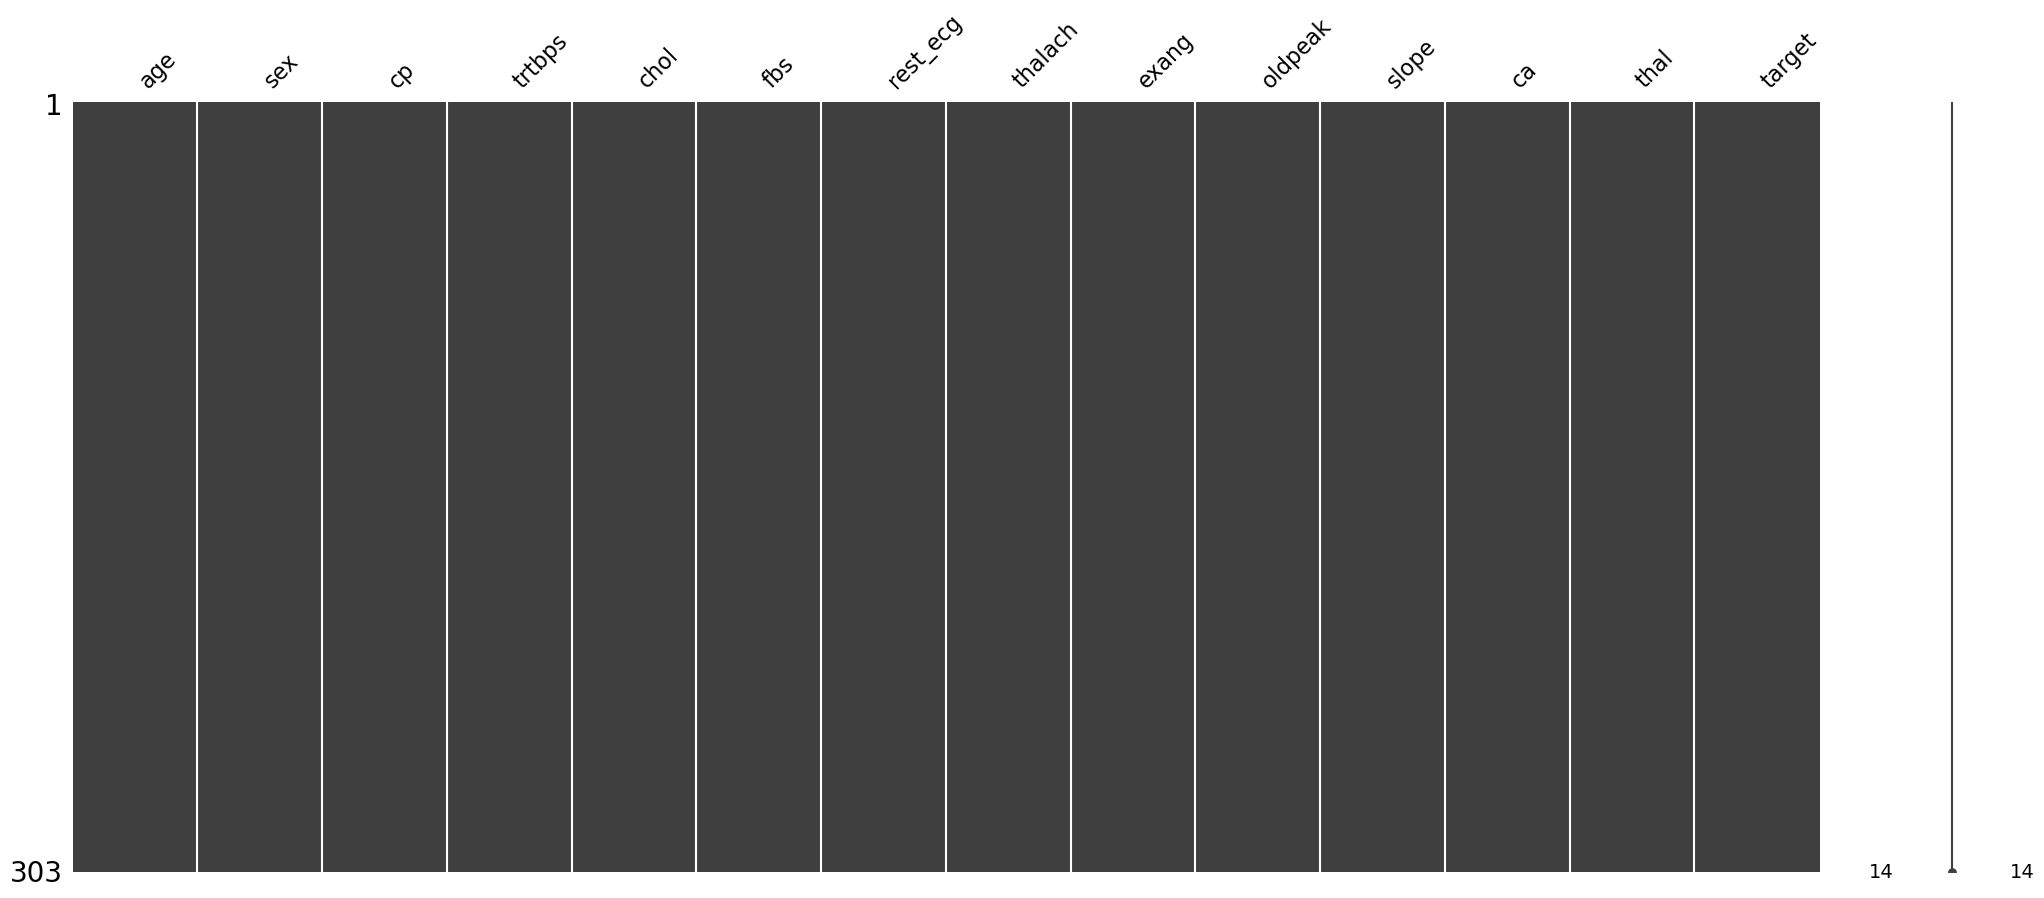

In [11]:
msno.matrix(df)
plt.show()

### Check missing values

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


In [16]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


According to the result from the unique value dataframe;

I determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.

Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”

Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

#### Separating variables (Numeric or Categorical)

In [19]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

In [20]:
# We applied the "Describe" method to see the basic statistics of numerical data
df[numeric_var].describe()
# The analyzes we infered from the describe method are below the graphs of each variable below.

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [21]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [22]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]

In [23]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

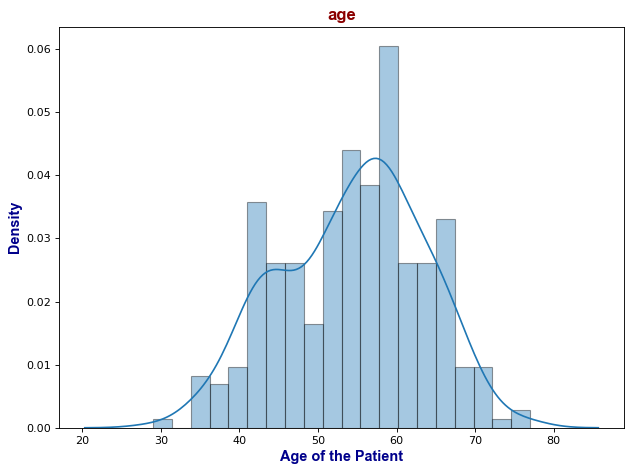

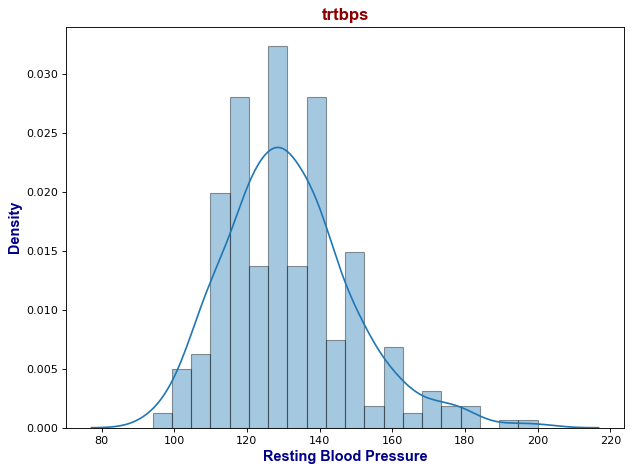

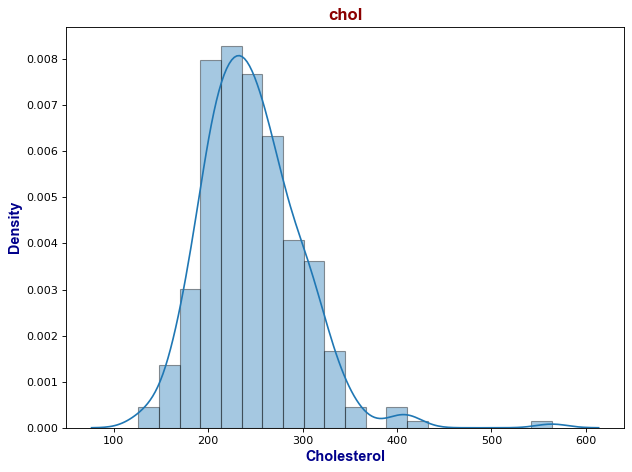

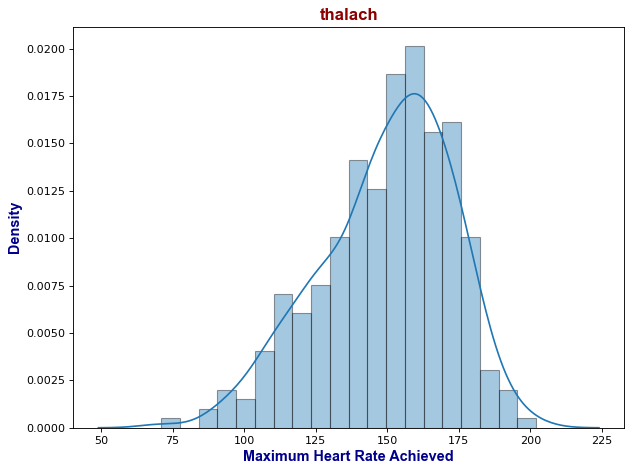

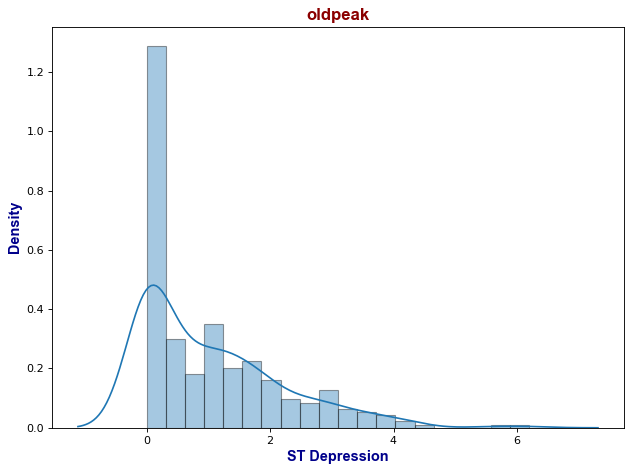

In [24]:
import seaborn as sns
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

Age Variable
The vast majority of patients are between 50 and 60.
There is a remarkable place on the chart. There is a decrease in patients between the ages of 47-and 50.
It looks like there are no outliers in the variable.

Trtbps Variable
The resting blood pressure of most patients is generally between 110 and 140.
Values after 180 can be considered as outliers.
There is hefty patient traffic between 115-120, 125-130, and 155-160 values.

Cholesterol Variable
Cholesterol value in most patients is between 200-and 280.
Values after 380 can be considered as outliers.

Thalach Variable
The maximum heart rate achieved in most patients is between 145-and 170.
In particular, The values before 80 can be considered outliers.

Oldpeak Variable
Values of the vast majority of patients in the variable range from 0 to 1.5.
Especially values after 2.5 can be considered as outliers.

In [26]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [28]:
list(zip(categoric_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

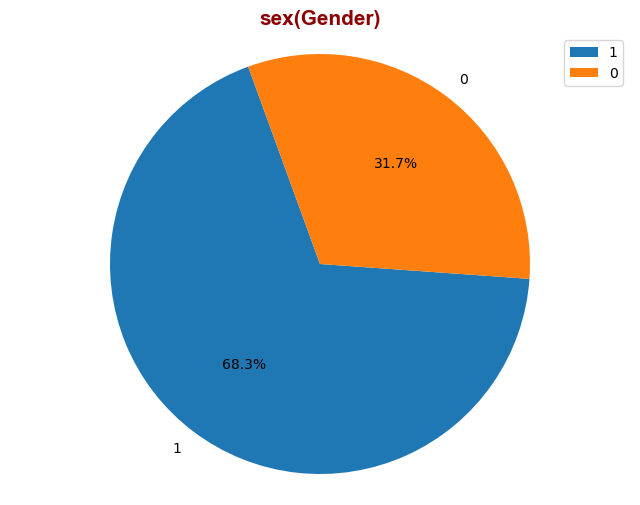

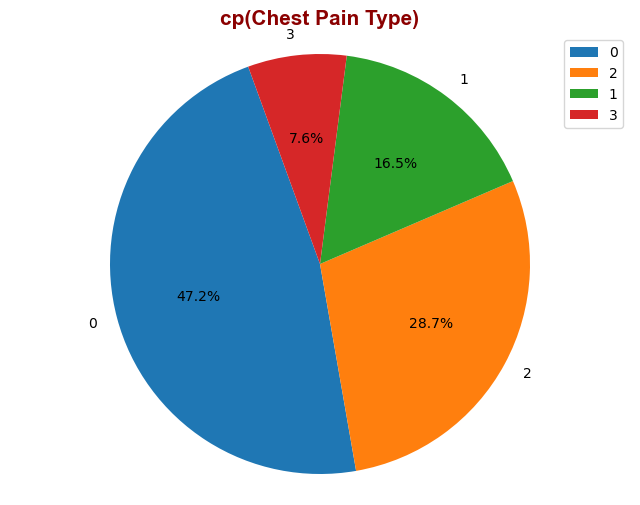

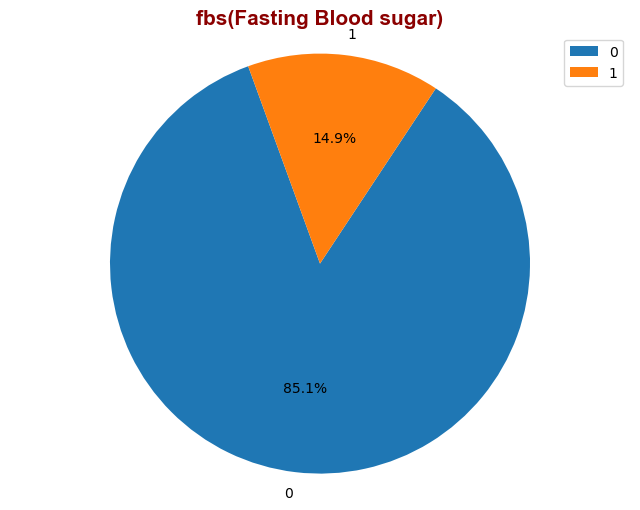

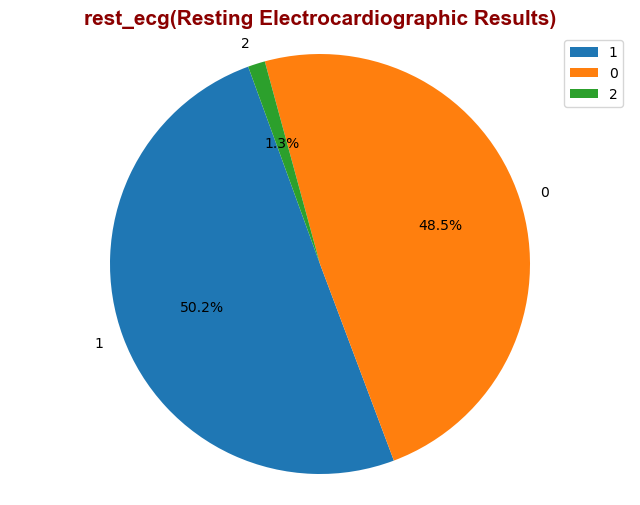

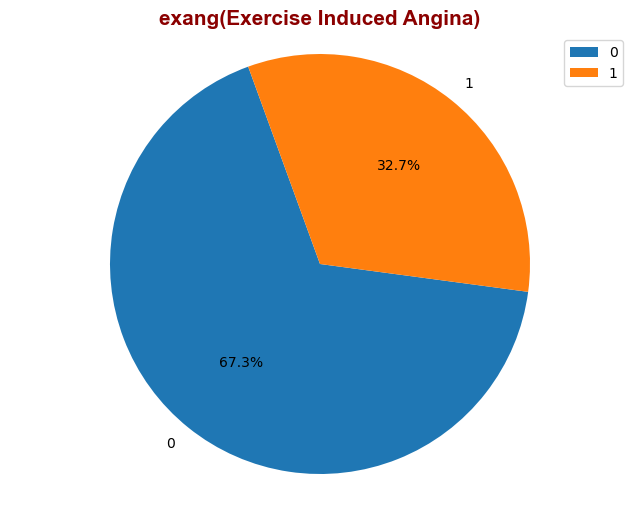

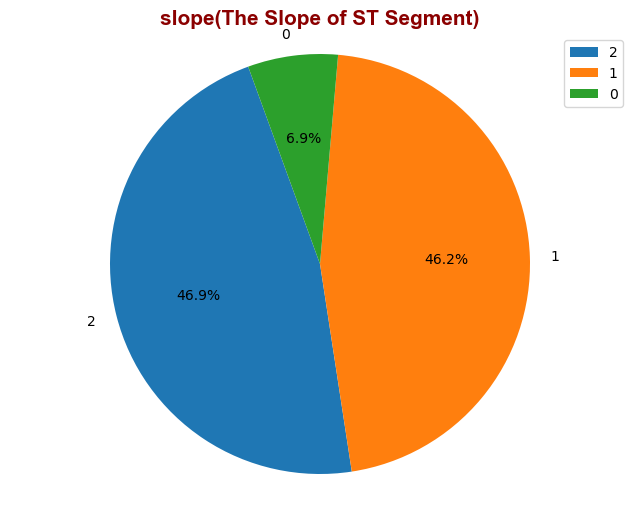

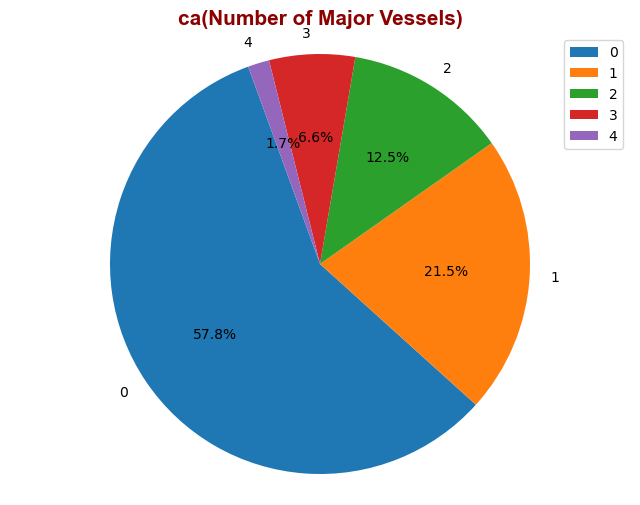

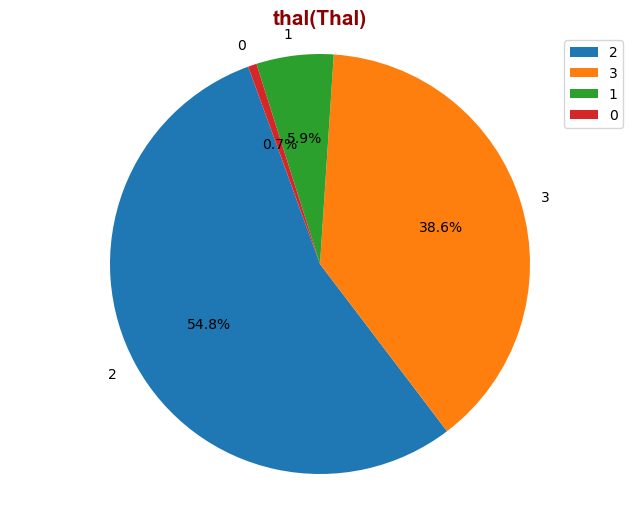

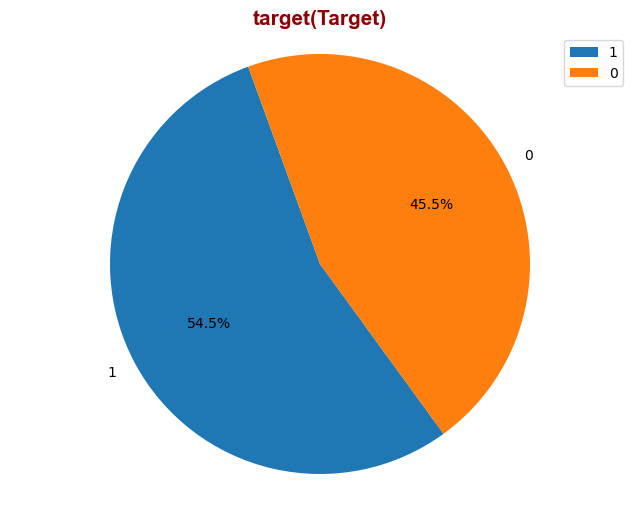

In [29]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

Sex Variable¶
68.3% of the patients are male, 31.7% are female.
So, the number of male patients is more than twice that of female patients.
    
Cp Variable
Almost half of the patients have an observation value of 0. In other words, there is asymptomatic angina
Half of the patients are asymptomatic; they have pain without symptoms.
If we examine the other half of the pie chart, 1 out of 4 patients has an observation value of 2.
In other words, atypical angina is in 29% of the patients.
This observation value shows patients with shortness of breath or non-classical pain.
The other two observation values are less than the others.
16.5% of patients have a value of 1. In other words, typical angina is seen. Typical angina is the classic exertion pain that comes during any physical activity.
The other 8% has the value of non-anginal pain, which is three types of angina.
Non-anginal pain is the term used to describe chest pain that is not caused by heart disease or a heart attack.
    
Fbs Variable
The vast majority of patients have an observation value of 1. In other words, 85%.
The fasting blood sugar of these patients is more than 120 mg/dl.
The remaining 15 percent have a less than 120 mg/dl fasting blood glucose level.
    
Rest_ecg Variable
The thing that draws attention to the image of this variable is that the number of patients with two observation values is negligible.
It has a value of 1.3 percent. When we look at all of these patients, it is not a very important number.
This value represents the ST and T wavelengths of the patients.
Another point that draws attention to this graph is; The total numbers of other patients with observation values of 1 and 0 are almost equal.
The size of those with 1, that is, the orange part on the graph is 50.2%
This means that the resting electrocardiographic results of these patients are normal.
The percentage of patients with a value of 0 is 48.5%.
That is, the patients' values of 48.5% are normal.
    
Exang Variable
We have said that this variable stands for exercise-induced angina.
Angina is the chest pain caused by the coronary artery's involuntary contraction that feeds the heart.
According to the variable "exang," the pain caused by this angina is represented by a value of 1 if it occurs with any exercise and 0 if it does not.
In this context, Values 0 are more than twice as values 1. More than half of the patients do not have exercise-induced angina.
       
Slope Variable
The minimum observation value is 0 with 7 percent.
This is patients with a downward slope of the ST wavelength.
The other two observation values are almost equal to each other.
The ST wavelength of half of the remaining patients is 1, that is straight, while the observation value of the other half is 2, that is, the ST wavelength is sloped upwards.

       
Ca variable
This variable is the number of great vessels colored by fluoroscopy.
In more than half of the patients, 57.8 percent, the number of large vessels is 0. That is, the number of large vessels colored by fluoroscopy is absent.
After 0 observation value, the other value with the most slices in the pie chart 1
The number of large vessels observed in 21.5% of the patients is 1
The majority of patients have an occlusion in their veins. Therefore, large vessels cannot be observed with the fluoroscopy technique.
Thal Variable
       
The "Thal" variable is short for the "Thallium stress test."
The thallium stress test is simply an imaging method that evaluates the amount of blood reaching the heart muscle and determines whether a person has coronary artery disease.
There are three observation values in the description of this variable. However, the pie chart shows four values. Values 0, 1, 2 and 3.
According to our research, the observation value of 0 is null. Therefore, in the next step, 0 observation values will be returned to null and filled with logical data.
In this context, according to the thallium stress test results, 54.8 percent of the patients have two observation values, so the test result appears to be expected.
36.8 percent has a value of 3, so we can say that this value is a reversible defect as an explanation.
5.9 percent of patients have a value of 1, so the test result for these patients is a fixed defect.
    
Target Variable
More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent have no heart attack risk.

In [31]:
df[df["thal"] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [32]:
df["thal"] = df["thal"].replace(0, np.nan)

In [33]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [34]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])


,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [35]:
df["thal"].fillna(2, inplace = True)
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [36]:
df["thal"] = pd.to_numeric(df["thal"], downcast = "integer")

In [37]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [38]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [39]:
numeric_var.append("target")

In [40]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [41]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [42]:
df[numeric_var].corr().iloc[:, [-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


In [43]:
df[categoric_var].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [44]:
df[categoric_var].corr().iloc[:, [-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


In [45]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [46]:
numeric_var.remove("target")

In [47]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


### Standarize dataset

In [49]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(df[numeric_var])
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [50]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [51]:
df_new = pd.concat([df_scaled, df.loc[:, "target"]], axis = 1)

In [52]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [53]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [54]:
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)

In [55]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [56]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


<Axes: >

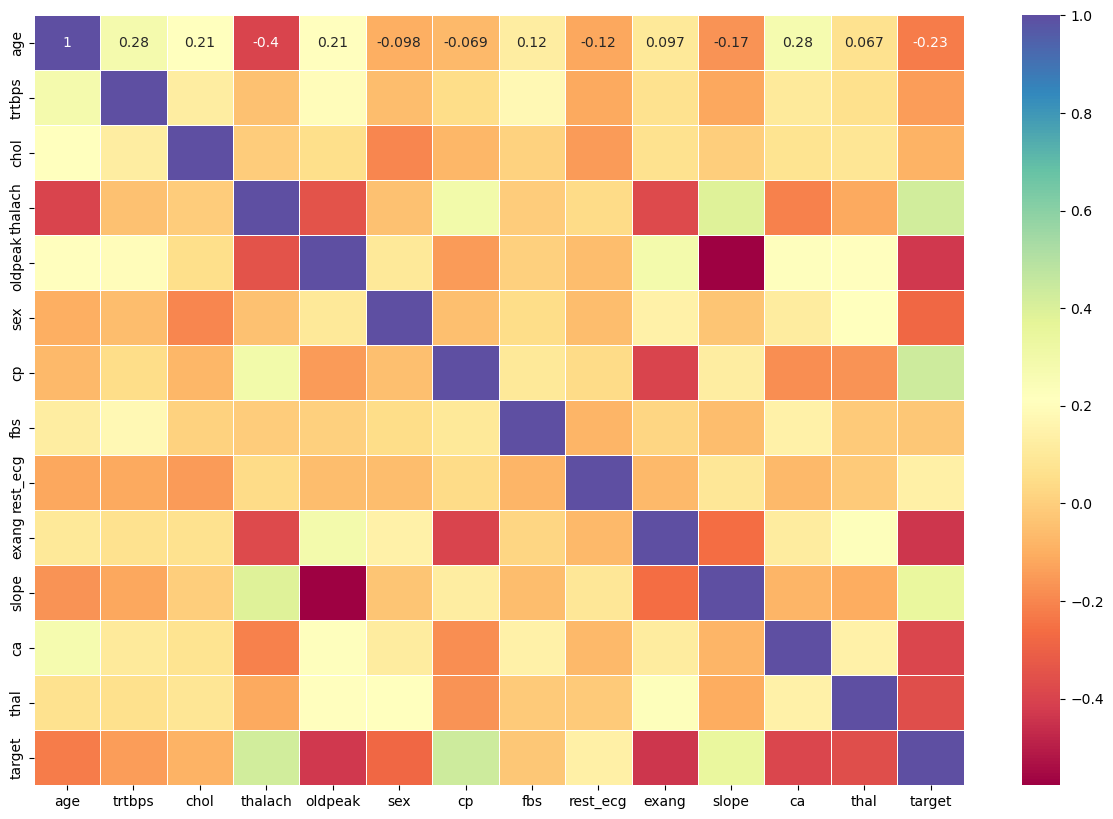

In [57]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)


Age Variable¶
The variable with the highest correlation with the "age" variable is the "thalach" variable. There is a negative correlation between them, which we can call moderately.

Trtbps Variable¶
The variable with the highest correlation with the "trtbps" variable is the "age" variable. The correlation between them is 0.28
There is a positive low-intensity correlatio
n.
Chol Variable
The variable with the highest correlation with the "chol" variable is the "age" variable
There is a correlation with a magnitude of 0.21. This is a low positive correlation.
So, we can say that as age increases, cholesterol also incr
eases.
Thalach Variable
The variable with the highest correlation to the "Thalach" variable is the "target" variable.
There is a 0.42 positive and moderate correlation between them. In other words, it is a variable that can directly trigger a heart attack.
There is a variable with which this variable has many correlations.
It means that the maximum heart rate reached maybe a situation triggered by other
 variables.
Oldpeak Variable
It has the most significant correlation ratio among this changing table. This correlation is -0.58 with the "slope" variable.
There is a negative correlation between them, which is slightly above medium intensity.
The most significant correlation after the "slope" variable is with the "ta
rget" variable.
Sex Variable
There is no robust correlation between the variable "Sex" and other variables.
The highest figure is -0.28 with the target variable. There is a negative low-intensity correlation between them.
Cp Variable
Cp variable captures the high correlation with "thalach", "exang", and "target" variables.
The highest is again the "target" variable. There is a direct pro
portion between them.
Fbs Variable
The "Fbs" variable generally does not correlate with other variables.
The highest correlation with 0.18 belongs to the "trtbps" variable. There is a low positive correlation.
But we can say that when fasting blood sugar increases, resting blood
 pressure also increases.
Rest_ecg Variable
There is no strong correlation between the "Rest_ecg" variable and other variables.
The highest correlation was 0.14 with the "target" variable. There is a positiv
e low-intensity correlation.
Exang Variable
The variable with the highest correlation to the exercise-induced angina variable is the target variable with -0.44
Also, It seems to be associated with more tha
n one variable except "target".
Slope Variable
The variable with the highest correlation to the "slope" variable is the old peak variable. There is an above-moderate correlation between these two. It is the most significant relationship in the table with 0.58
It has a moderate correlation with the variables "thalach" and "target".
The relations
hip with other variables is fragile
Ca Variable
The variable with which the "Ca" variable has the highest correlation is the target variable with -0.39.
Then comes the "age" variable with 0.28. We can say that there is a low posit
ive correlation with the age variable.
Thal Variable
The variable with which the "Thal" variable has the highest correlation is the variable "target" with -0.36.
It has not had very high corre
lation coefficients with other variables.
Target Variable
The "target" variable correlates with more than one variable.
In general, we can say a relationship is below the middle level.

In [59]:
# Drop low cow correlation cols
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


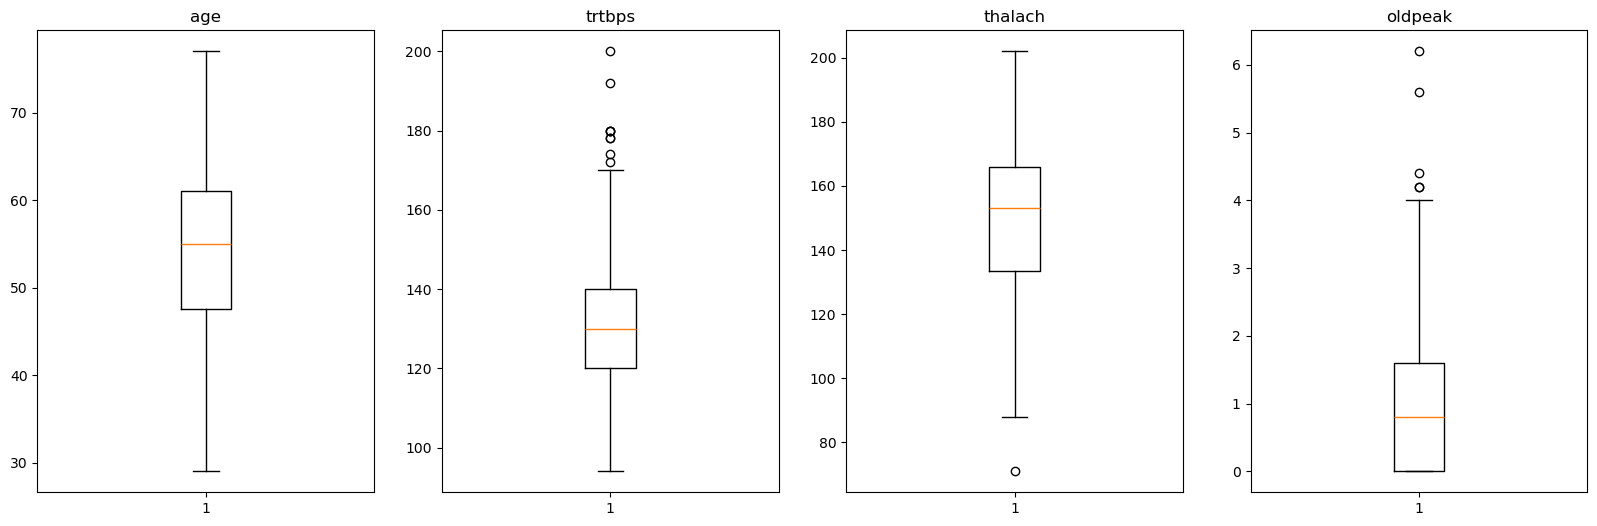

In [61]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

In [62]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 

In [63]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [64]:
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps < threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 252
-------------------
Threshold Value: 2
Number of Outliers: 290
-------------------
Threshold Value: 3
Number of Outliers: 301
-------------------


In [65]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [66]:
df[z_scores_trtbps > 2].trtbps.min()
df[df["trtbps"] < 170].trtbps.max()

165

In [67]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [68]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [69]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

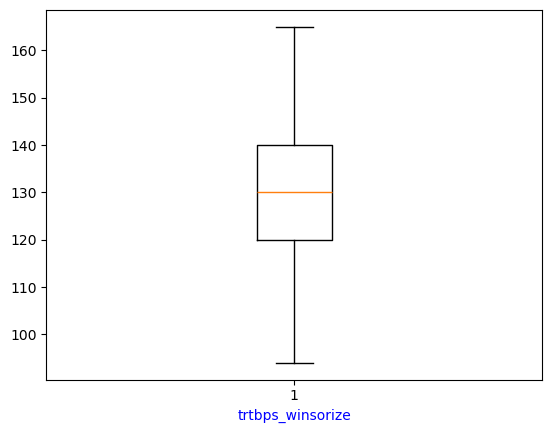

In [70]:
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [71]:
df["trtbps_winsorize"] = trtbps_winsorize

In [72]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


In [73]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [74]:
thalach_out = iqr(df, "thalach")

In [75]:
thalach_out

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [76]:
df.drop([272], axis = 0, inplace = True)

In [77]:
df["thalach"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

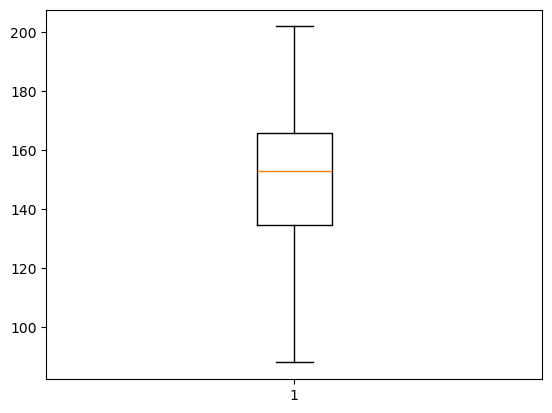

In [78]:
plt.boxplot(df["thalach"]);

In [79]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

In [80]:
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


In [81]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [82]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [83]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

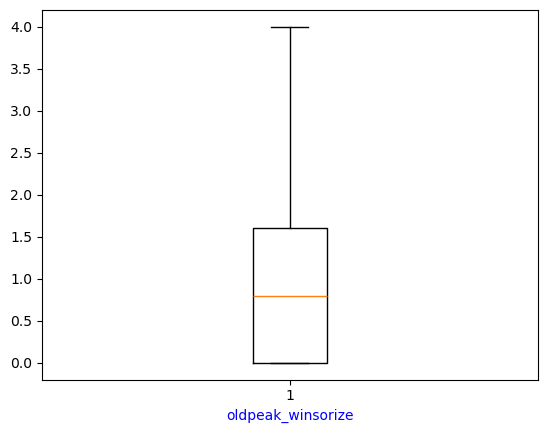

In [84]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [85]:
df["oldpeak_winsorize"] = oldpeak_winsorize

In [86]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


In [87]:
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)

In [88]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


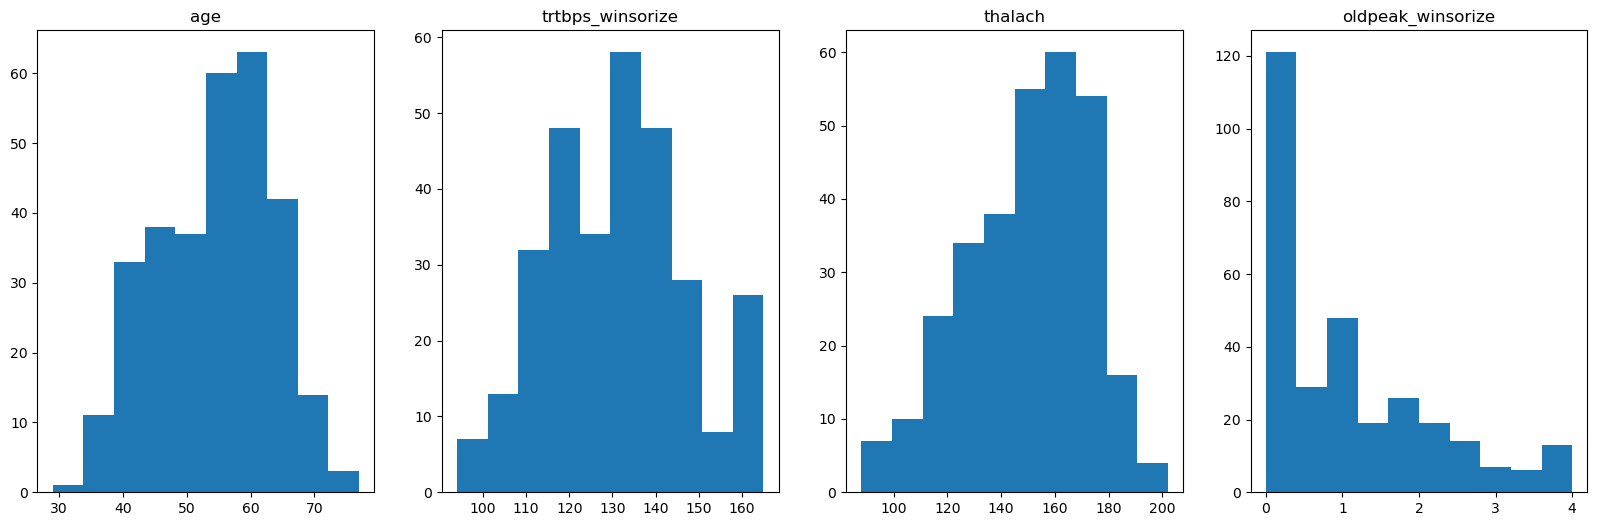

In [89]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalach"])
ax3.set_title("thalach")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [90]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


In [91]:
df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"])
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"])

In [92]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [93]:
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [94]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

In [95]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [96]:
#### Applying One Hot Encoding Method to Categorical Variables

df_copy = df.copy()

In [97]:
categoric_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [98]:
categoric_var.remove("fbs")
categoric_var.remove("rest_ecg")

In [99]:
categoric_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [100]:
df_copy = pd.get_dummies(df_copy, columns = categoric_var[:-1], drop_first = True)

In [101]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,True,False,False,True,False,False,False,False,False,False,False,False,False
1,37,187,1,130,1.870829,True,False,True,False,False,False,False,False,False,False,False,True,False
2,41,172,1,130,1.183216,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,178,1,120,0.894427,True,True,False,False,False,False,True,False,False,False,False,True,False
4,57,163,1,120,0.774597,False,False,False,False,True,False,True,False,False,False,False,True,False


In [102]:
new_numeric_var = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [103]:
robus_scaler = RobustScaler()

In [104]:
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])

In [105]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.309091,1.079365,1,0.00,0.771913,True,False,True,False,False,False,False,False,False,False,False,True,False
2,-1.018182,0.603175,1,0.00,0.228308,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0.072727,0.793651,1,-0.50,0.000000,True,True,False,False,False,False,True,False,False,False,False,True,False
4,0.145455,0.317460,1,-0.50,-0.094734,False,False,False,False,True,False,True,False,False,False,False,True,False


In [106]:
y = df_copy["target"]
X = df_copy.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 3)

In [107]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,True,False,False,False,True,True,False,True,False,False,False,False,True
82,0.363636,0.222222,-1.40,-0.707107,False,False,True,False,False,False,True,True,False,False,False,True,False
187,-0.072727,-1.396825,-0.30,0.465497,True,False,False,False,True,True,False,True,False,False,False,False,True
259,-1.236364,0.920635,-0.50,0.833997,True,False,False,True,True,True,False,False,False,False,False,False,True
5,0.145455,-0.158730,0.50,-0.207107,True,False,False,False,False,True,False,False,False,False,False,False,False


In [108]:
y_train.head()

201    0
82     1
187    0
259    0
5      1
Name: target, dtype: int64

In [109]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


### Modelling

#### 1. Logistic Regression

In [112]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[ 6  3]
 [ 1 21]]


Accuracy of Logistic Regression: 87.09677419354838 

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.88      0.95      0.91        22

    accuracy                           0.87        31
   macro avg       0.87      0.81      0.83        31
weighted avg       0.87      0.87      0.87        31



In [113]:
### Cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_test, y_test, cv = 20)
print("Cross-Validation Accuracy Scores", scores.mean())


Cross-Validation Accuracy Scores 0.85


#### ROC Curve and Area Under Curve(AUC)

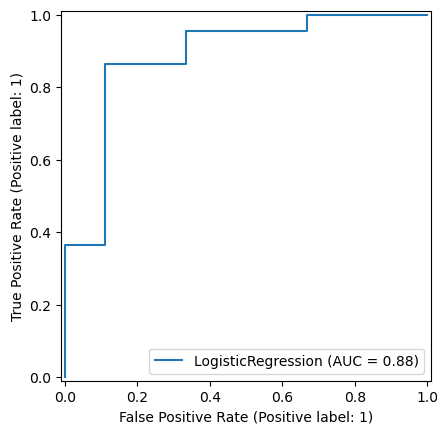

In [115]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

##### Hyperparameter Optimization(with GridSearchCV)

In [117]:
from sklearn.model_selection import GridSearchCV

log_reg_new = LogisticRegression()
log_reg_new

parameters = {"penalty":["l1","l2"], "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg_grid = GridSearchCV(log_reg_new, param_grid = parameters)

log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [118]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [119]:
log_reg_new2 = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [120]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [121]:
y_pred = log_reg_new2.predict(X_test)
print("The test accuracy score of Logistic Regression After hyper-parameter tuning is: {}".format(accuracy_score(y_test, y_pred)))

The test accuracy score of Logistic Regression After hyper-parameter tuning is: 0.8709677419354839


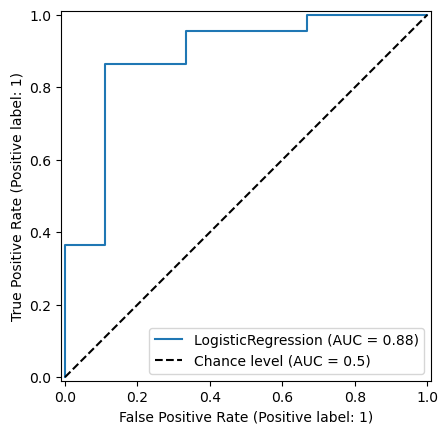

In [122]:
# Calculate ROC curve
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test,plot_chance_level= True)

#### 2. Naive Bayes

In [124]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[ 6  3]
 [ 2 20]]


Accuracy of Naive Bayes model: 83.87096774193549 

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.87      0.91      0.89        22

    accuracy                           0.84        31
   macro avg       0.81      0.79      0.80        31
weighted avg       0.83      0.84      0.84        31



In [125]:
scores = cross_val_score(nb, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores for Naive bayes", scores.mean())

Cross-Validation Accuracy Scores for Naive bayes 0.7166666666666667


##### 3. RandomForest

In [127]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 7  2]
 [ 2 20]]


Accuracy of Random Forest: 87.09677419354838 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.91      0.91      0.91        22

    accuracy                           0.87        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.87      0.87      0.87        31



In [128]:
scores = cross_val_score(rf, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


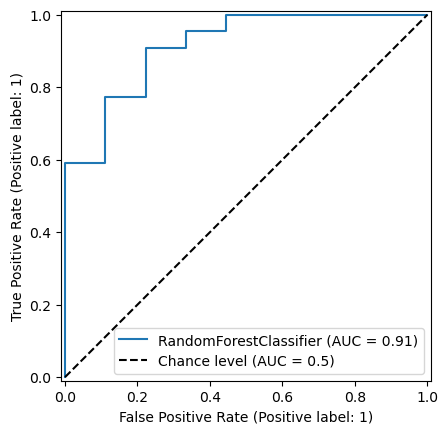

In [129]:
# Calculate ROC curve
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test,plot_chance_level= True)

#### 4. xgboost

In [131]:
from xgboost import XGBClassifier
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 7  2]
 [ 1 21]]


Accuracy of Extreme Gradient Boost: 90.32258064516128 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.91      0.95      0.93        22

    accuracy                           0.90        31
   macro avg       0.89      0.87      0.88        31
weighted avg       0.90      0.90      0.90        31



In [132]:
scores = cross_val_score(xgb, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7083333333333334


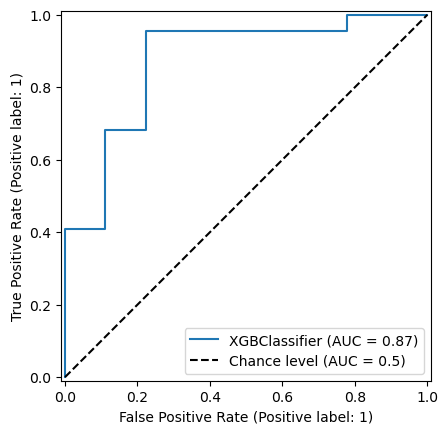

In [133]:
# Calculate ROC curve
xgb_disp = RocCurveDisplay.from_estimator(xgb, X_test, y_test,plot_chance_level= True)

#### 5. KNN Classifier

In [135]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[ 7  2]
 [ 3 19]]


Accuracy of K-NeighborsClassifier: 83.87096774193549 

              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.90      0.86      0.88        22

    accuracy                           0.84        31
   macro avg       0.80      0.82      0.81        31
weighted avg       0.85      0.84      0.84        31



In [136]:
scores = cross_val_score(knn, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.7666666666666667


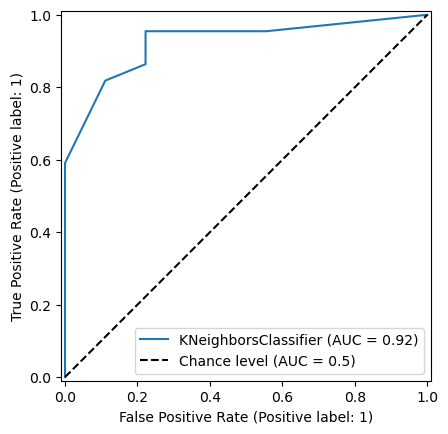

In [137]:
# Calculate ROC curve
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test,plot_chance_level= True)

#### 6. Decision Tree

In [139]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state = 5)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[ 8  1]
 [ 4 18]]


Accuracy of DecisionTreeClassifier: 83.87096774193549 

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.95      0.82      0.88        22

    accuracy                           0.84        31
   macro avg       0.81      0.85      0.82        31
weighted avg       0.87      0.84      0.84        31



In [140]:
scores = cross_val_score(dt, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333333


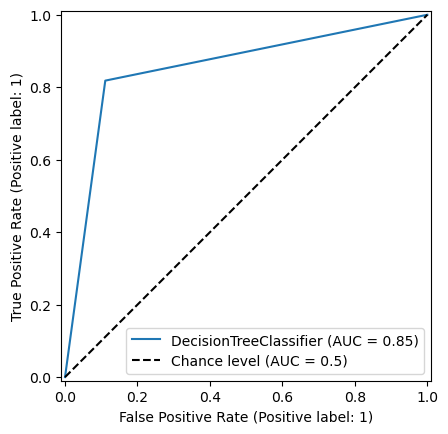

In [141]:
# Calculate ROC curve
dt_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test,plot_chance_level= True)

#### 7. SVM

In [143]:
m7 = 'Support Vector Classifier'
svc =  SVC(random_state = 5)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 7  2]
 [ 2 20]]


Accuracy of Support Vector Classifier: 87.09677419354838 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.91      0.91      0.91        22

    accuracy                           0.87        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.87      0.87      0.87        31



In [144]:
scores = cross_val_score(svc, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333334


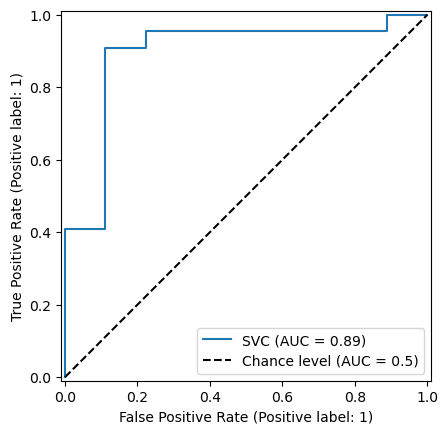

In [145]:
# Calculate ROC curve
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test,plot_chance_level= True)

In [146]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','RF','Gradient Boost',
                    'K-NN','Decision Tree','SVM'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,87.096774
1,Naive Bayes,83.870968
2,RF,87.096774
3,Gradient Boost,90.322581
4,K-NN,83.870968
5,Decision Tree,83.870968
6,SVM,87.096774


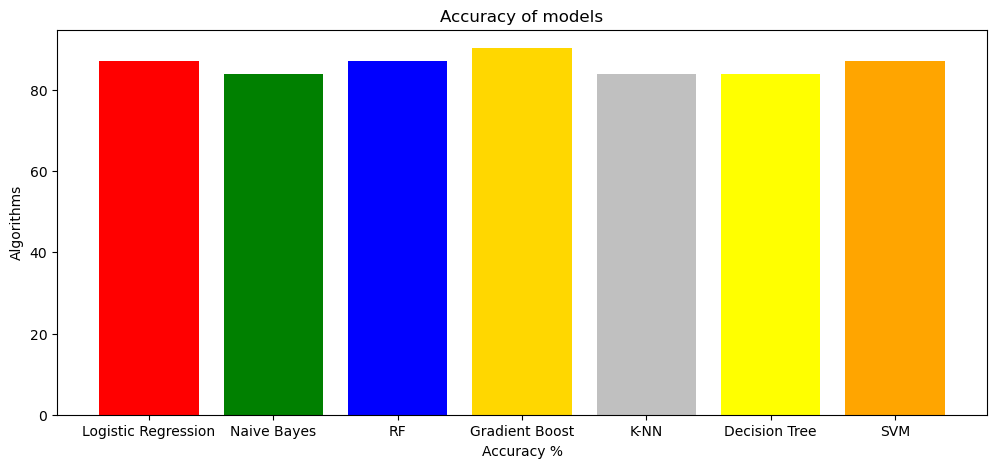

In [147]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("Accuracy of models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()